In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime
import seaborn as sns

In [2]:
#import the Solar Panel dataframe
df = pd.read_csv('Solar_Ninja_Data_1kW.csv')
df['time'] = pd.to_datetime(df['time'])

In [3]:
#insert relevant columns to compute a heatmap from
df['Date']=df['time'].dt.date
df['Month']=df['time'].dt.month_name()
df['Day']=df['time'].dt.day_name()
df['Hour']=df['time'].dt.hour


#sort the dataframe columns in a desired order
df = df[['Month','Hour','electricity']]

In [4]:
#formatting the dataframe so that it can be plotted into a heatmap

df1 = df.groupby(['Month', 'Hour'],sort=False).agg(['mean'])
df1.columns=df1.columns.droplevel(0)
df1.reset_index(inplace=True)
heatmap_data = pd.pivot_table(df1, values='mean', index=['Month'], columns='Hour')

In [5]:
cols=list(heatmap_data)
heatmap_data = heatmap_data.loc[:, cols]
Months=df1.Month.unique().tolist()
heatmap_data=heatmap_data.loc[Months]


Text(0.5, 1.0, ' Solar Panel Electricity (kW) 2015')

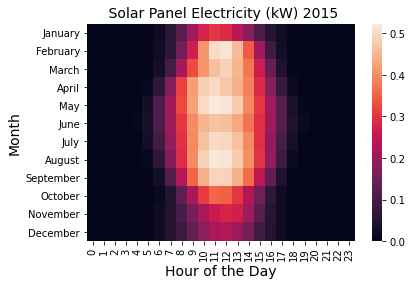

In [6]:
sns.heatmap(heatmap_data)
plt.xlabel("Hour of the Day", size=14)
plt.ylabel("Month", size=14)
plt.title(" Solar Panel Electricity (kW) 2015", size=14)